## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:



The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.

In [6]:
#import the warnings
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')



In [8]:
#import the useful libraries.
import pandas as pd
df = pd.read_csv('/content/Bank Telemarketing Campaign.csv')


## Session- 2, Data Cleaning

### Segment- 2, Data Types

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set.

In [9]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0 = pd.read_csv('/content/Bank Telemarketing Campaign.csv')

In [10]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [11]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv('/content/Bank Telemarketing Campaign.csv', skiprows = 2)


In [12]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [13]:
#print the information of variables to check their data types.
inp0.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [14]:
#convert the age variable data type from float to integer.
import numpy as np
inp0['age'] = inp0['age'].replace([np.nan, np.inf], np.nan)  # replace inf with NaN
inp0 = inp0.dropna(subset=['age'])  # drop rows with NaN in 'age'
inp0['age'] = inp0['age'].astype(int)
print(inp0['age'])

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45191, dtype: int64


In [15]:
#print the average age of customers.
average_age = inp0['age'].mean()
print(f"The average age of customers is {average_age:.2f}")

The average age of customers is 40.94


#### Dropping customer id column.

In [16]:
#drop the customer id as it is of no use.
if 'customerid' in inp0.columns:
    inp0 = inp0.drop(columns=['customerid'])
    print("'customerid' column dropped successfully.")
else:
    print("The 'customerid' column does not exist in the DataFrame.")

'customerid' column dropped successfully.


#### Dividing "jobedu" column into job and education categories.

In [17]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [18]:
#Extract education in newly created 'education' column from "jobedu" column
inp0['education']= inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [19]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu", axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [20]:
#count the missing values in age column.
inp0.age.isnull().sum()

0

In [21]:
#pring the shape of dataframe inp0
inp0.shape

(45191, 19)

In [22]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

Drop the records with age missing.

In [23]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

#### handling missing values in month column

In [24]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [25]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [26]:
#find the mode of month in inp1
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [27]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)
inp1.month.value_counts(normalize=True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [28]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column

In [29]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [30]:
#calculate the percentage of missing values in response column.
inp1.shape
float(100*30/45191)

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [31]:
#drop the records with response missings in inp1.
inp1.dropna(subset=['response'], inplace=True)

# Verify the result
print(inp1)

       age  salary  balance   marital targeted default housing loan  \
0       58  100000     2143   married      yes      no     yes   no   
1       44   60000       29    single      yes      no     yes   no   
2       33  120000        2   married      yes      no     yes  yes   
3       47   20000     1506   married       no      no     yes   no   
4       33       0        1    single       no      no      no   no   
...    ...     ...      ...       ...      ...     ...     ...  ...   
45206   51   60000      825   married      yes      no      no   no   
45207   71   55000     1729  divorced      yes      no      no   no   
45208   72   55000     5715   married      yes      no      no   no   
45209   57   20000      668   married      yes      no      no   no   
45210   37  120000     2971   married      yes      no      no   no   

         contact  day      month              duration  campaign  pdays  \
0        unknown    5  may, 2017               261 sec         1     -1 

In [32]:
#calculate the missing values in each column of data frame: inp1.
missing_values = inp1.isna().sum()
print(missing_values)

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64


#### handling pdays column.

In [33]:
#describe the pdays column of inp1.
inp1.pdays.describe()


count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [34]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable

In [35]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

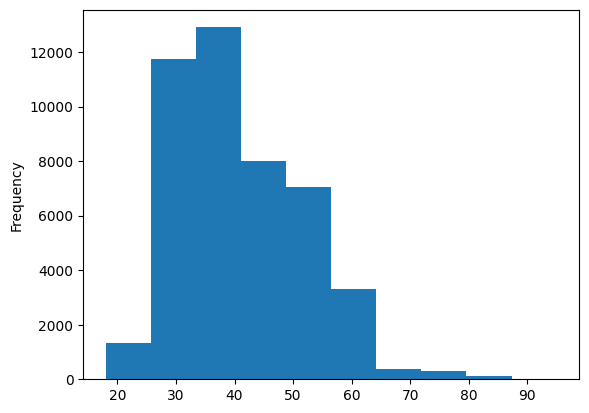

In [36]:
#plot the histogram of age variable.
import matplotlib.pyplot as plt

inp1.age.plot.hist()
plt.show()

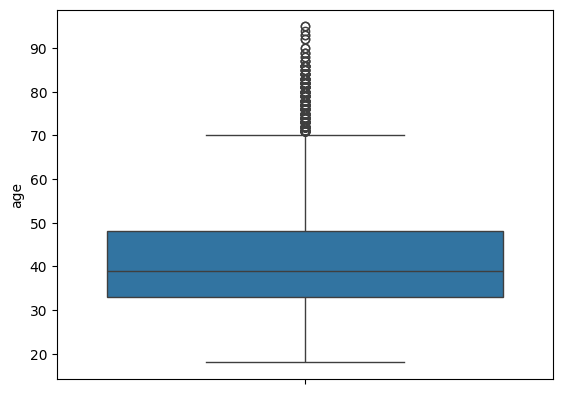

In [37]:
#plot the boxplot of age variable.
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(inp1.age)
plt.show()

#### Salary variable

In [38]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

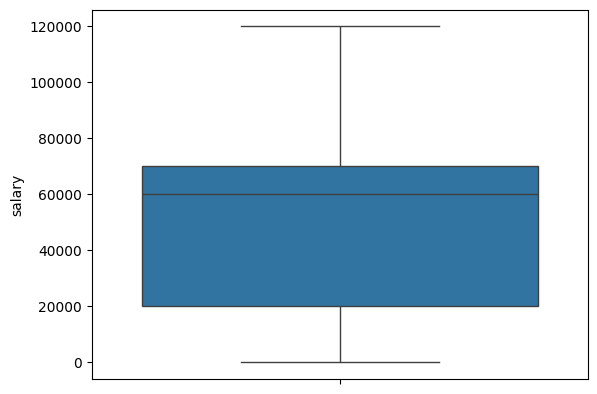

In [39]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable

In [40]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

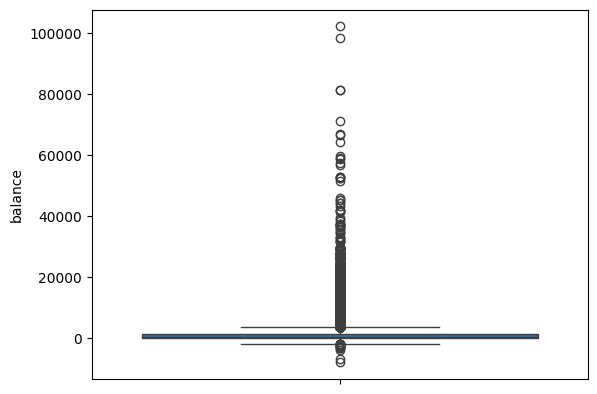

In [41]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)
plt.show()

In [42]:
#plot the boxplot of balance variable after scaling in 8:2.
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [43]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


### Segment- 6, Standardising values

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [44]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [45]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
# Function to convert duration into minutes
def convert_duration(x):
    # Check if x is a string
    if isinstance(x, str):
        parts = x.split()
        value = float(parts[0])
        if 'sec' in x:
            return value / 60  # Convert seconds to minutes
        elif 'min' in x:
            return value  # It's already in minutes
    # If it's already a number (float or int), return it as is
    elif isinstance(x, (float, int)):
        return x
    else:
        return x  # In case of unexpected type, return the value as is

# Apply the function to the 'duration' column
inp1['duration'] = inp1['duration'].apply(convert_duration)

inp1.dtypes

age            int64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

In [46]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis

### Segment- 2, Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status

In [47]:
#calculate the percentage of each marital status category.
inp1.marital.value_counts(normalize=True)*100

marital
married     60.195744
single      28.294325
divorced    11.509931
Name: proportion, dtype: float64

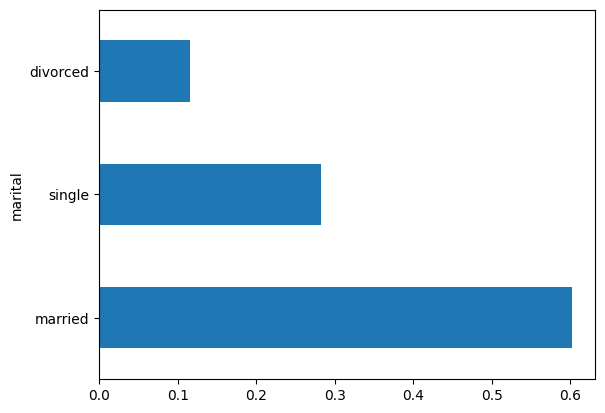

In [48]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()

#### Job  

In [49]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)*100

job
blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: proportion, dtype: float64

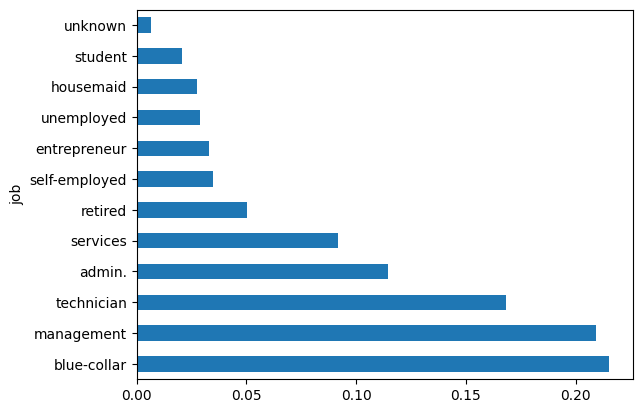

In [50]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [51]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

education
secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: proportion, dtype: float64

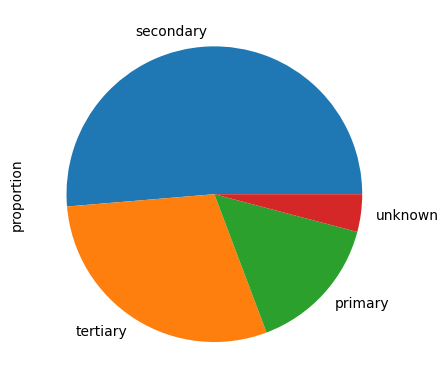

In [52]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome

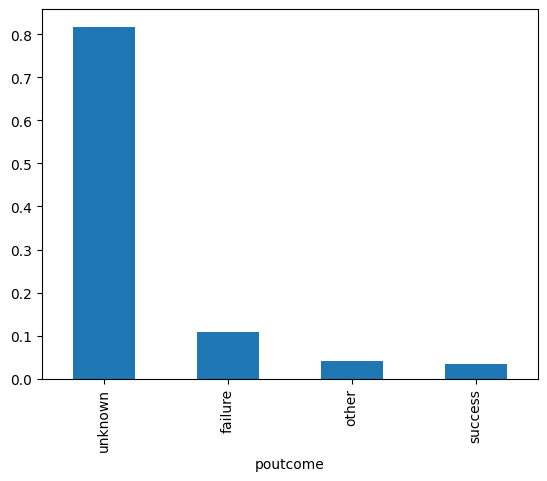

In [53]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response the target variable

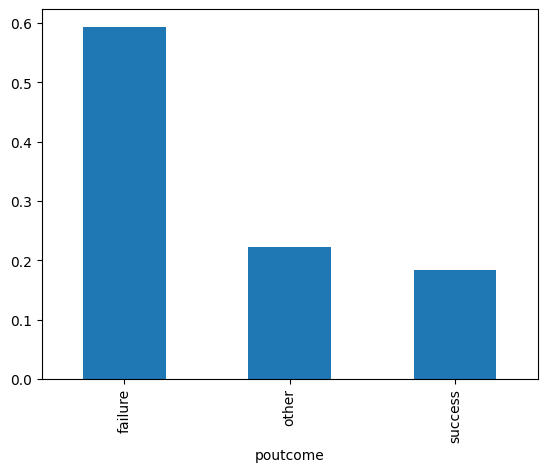

In [54]:
#calculate the percentage of each response category.
inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

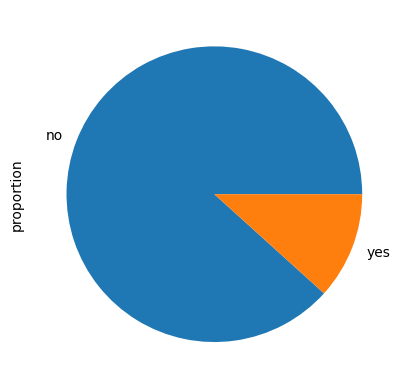

In [55]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

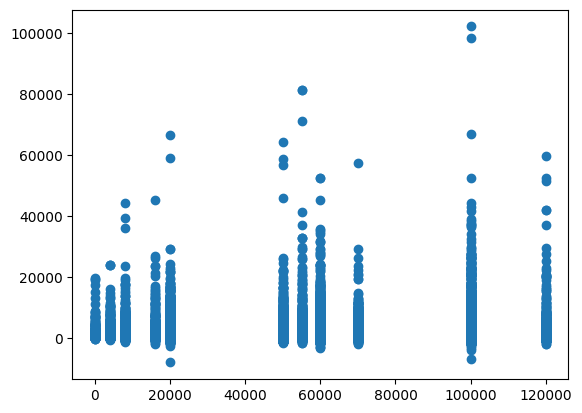

In [56]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)
plt.show()

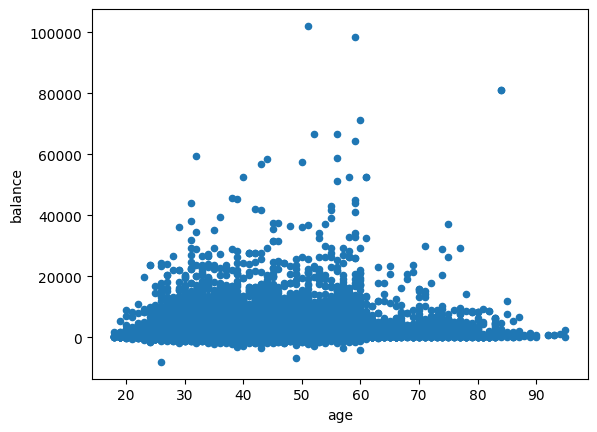

In [57]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x="age",y="balance")
plt.show()

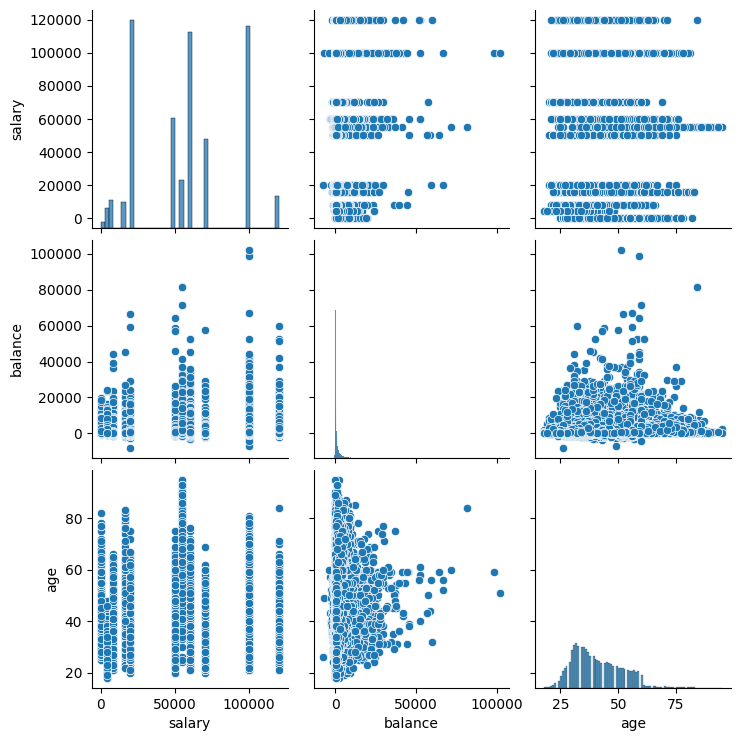

In [58]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=["salary", "balance", "age"])
plt.show()

#### Correlation heat map

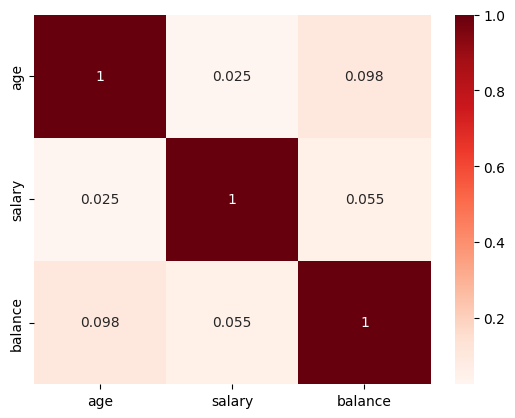

In [59]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["age", "salary", "balance"]].corr()
sns.heatmap(inp1[["age", "salary", "balance"]].corr(),annot=True, cmap="Reds")
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response

In [60]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [61]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

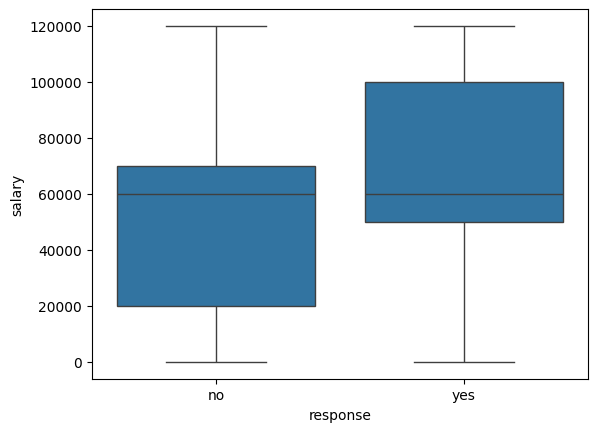

In [62]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x="response", y="salary")
plt.show()

#### Balance vs response

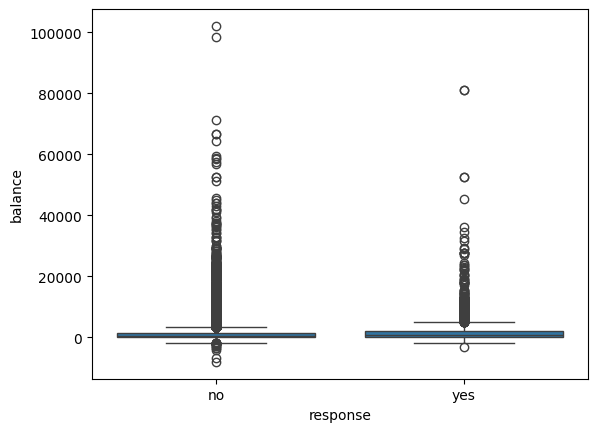

In [63]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, x="response", y="balance")
plt.show()

In [64]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [65]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile

In [66]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [67]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")["balance"].aggregate(["mean", "median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


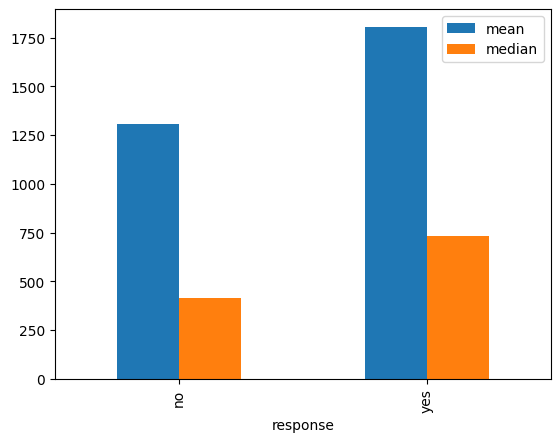

In [68]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby("response")["balance"].aggregate(["mean", "median"]).plot.bar()
plt.show()

#### Education vs salary

In [69]:
#groupby the education to find the mean of the salary education category.
inp1.groupby("education")["salary"].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [70]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [71]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby("job")["salary"].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable

In [72]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1["response_flag"]=np.where(inp1.response=="yes",1,0)
inp1.response_flag.value_counts()

response_flag
0    39876
1     5285
Name: count, dtype: int64

#### Education vs response rate

In [73]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(["education"])["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate

In [74]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(["marital"])["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

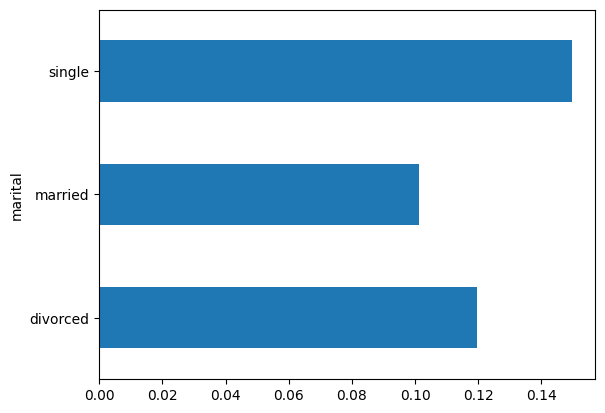

In [75]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()

#### Loans vs response rate

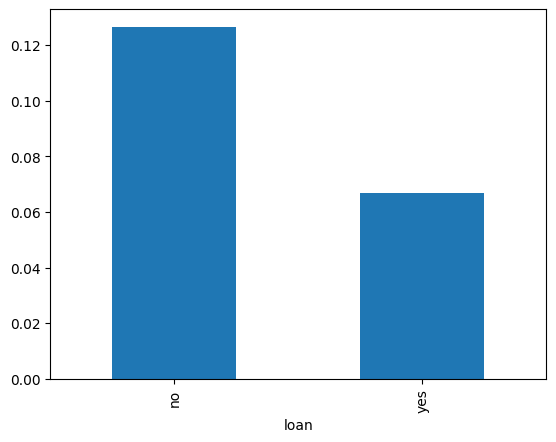

In [76]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(["loan"])["response_flag"].mean().plot.bar()
plt.show()

#### Housing loans vs response rate

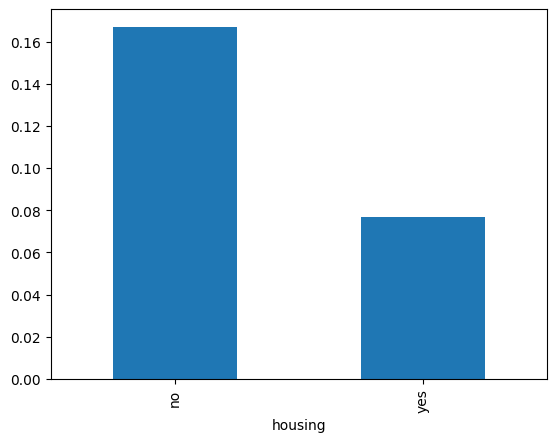

In [77]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(["housing"])["response_flag"].mean().plot.bar()
plt.show()


#### Age vs response

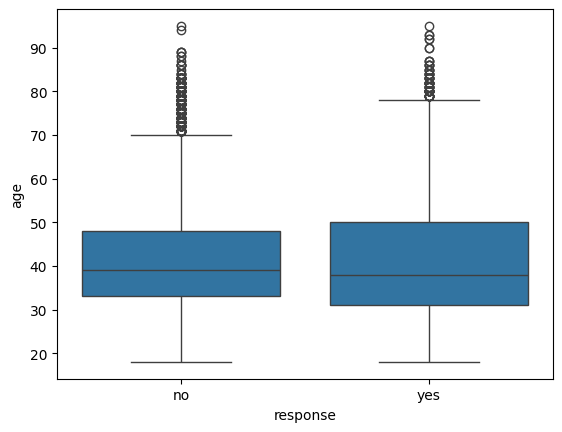

In [78]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1,x="response",y="age")
plt.show()

##### making buckets from age columns

In [79]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_group"]=pd.cut(inp1.age,[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [80]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
inp1.age_group.value_counts(normalize=True)

age_group
30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: proportion, dtype: float64

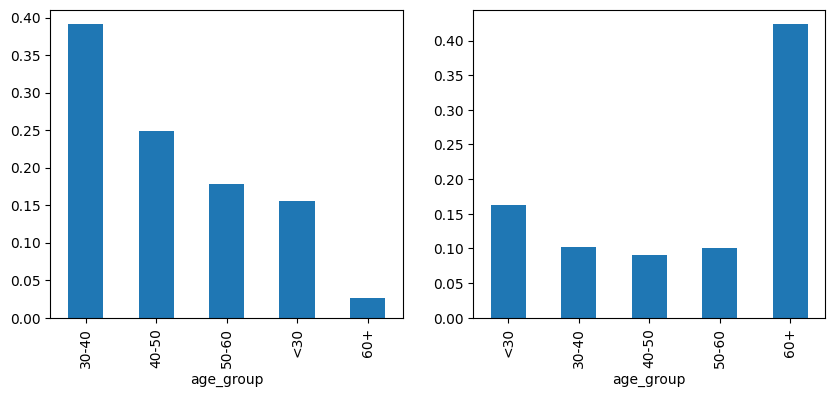

In [81]:
#plot the bar graph of job categories with response_flag mean value.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])["response_flag"].mean().plot.bar()
plt.show()

### Segment-6, Multivariate analysis

#### Education vs marital vs response

In [82]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
res


marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


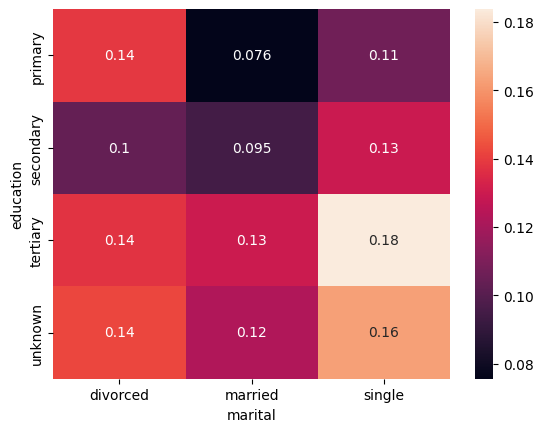

In [83]:
#create heat map of education vs marital vs response_flag
sns.heatmap(res, annot=True)
plt.show()

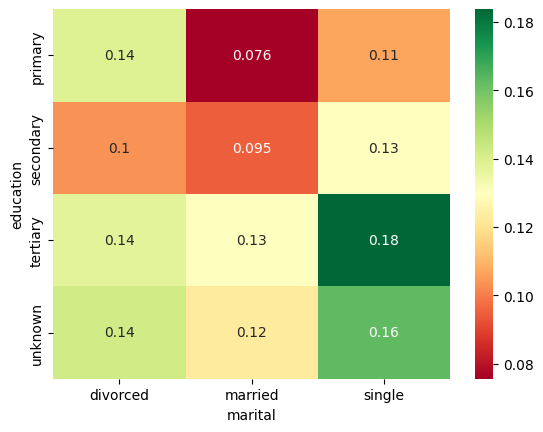

In [84]:
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()

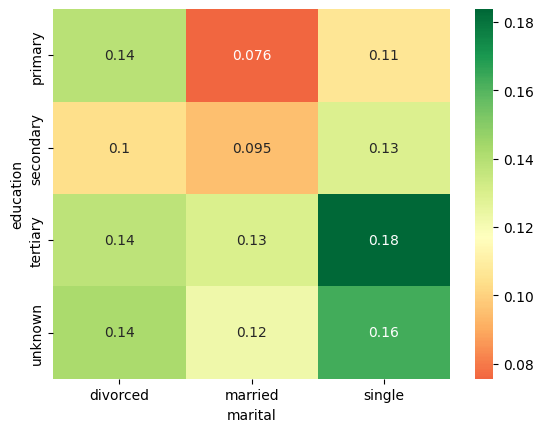

In [85]:
sns.heatmap(res, annot=True, cmap="RdYlGn", center=0.117)
plt.show()

#### Job vs marital vs response

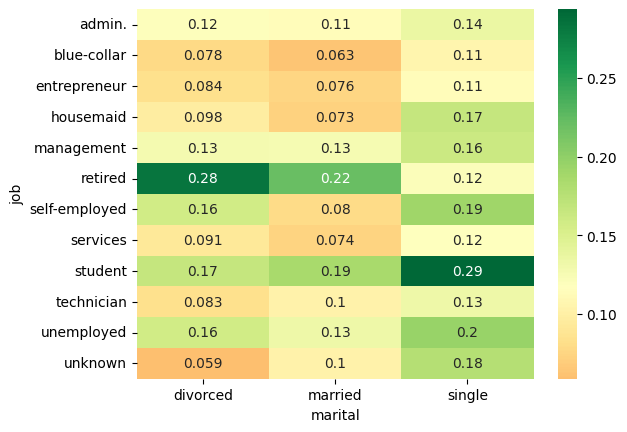

In [86]:
#create the heat map of Job vs marital vs response_flag.
res=pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res, annot=True, cmap="RdYlGn", center=0.117)
plt.show()

#### Education vs poutcome vs response

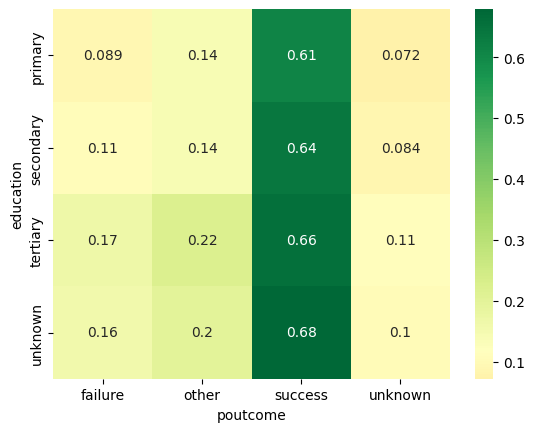

In [87]:
#create the heat map of education vs poutcome vs response_flag.
res=pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, annot=True, cmap="RdYlGn", center=0.117)
plt.show()